# 🍩 Correlation Analysis
This hypothesis is used to test whether there is a correlation between variables and to determine the direction and strength of the relationship.

**Hypotheses**

$H_0 : \rho = 0$ (no linear correlation in the population)  
$H_1 : \rho \neq 0$ (a linear correlation exists)  

**Test Statistic**
  
$t = \frac{r \sqrt{n-2}}{\sqrt{1 - r^2}}$

where correlation coefficient (sample):

$r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \; \sum_{i=1}^{n} (Y_i - \bar{Y})^2}}$

- $r$: Sample correlation coefficient  
- $\rho$: Population correlation coefficient  
- $n$: Sample size  
- $\bar{X}, \bar{Y}$: Sample means of $X$ and $Y$  
- $t$: Test statistic for significance of correlation  

**Assumptions:**
- Both $X$ and $Y$ are continuous and approximately normally distributed.
    - If this assumption holds → use Pearson correlation coefficient
    - If not → use Spearman rank correlation coefficient (non-parametric alternative)

---


![graph.png](correlation.jpg)

**Problem**: Test whether there is a correlation between the tips and total bill in the "tips" dataset.

#### » Import the "seaborn" to load tips dataset

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### » Remove the ‘tip’ column from the “total_bill” column, because it has already been added to the “total_bill” column

In [3]:
tips["total_bill"] -= tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


#### » Draw a "scatter" to observe the overall correlation between tips and total bill amount

<Axes: xlabel='tip', ylabel='total_bill'>

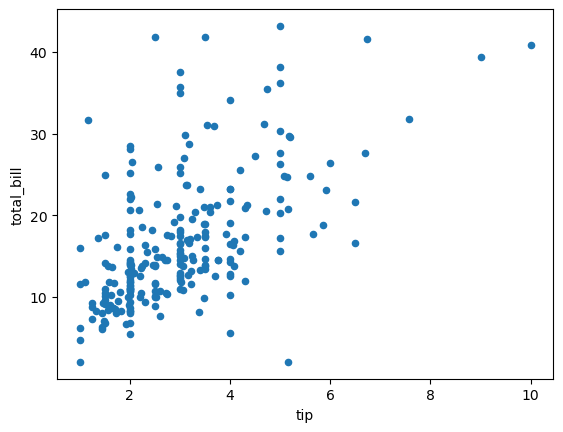

In [4]:
tips.plot.scatter("tip","total_bill")

### Normality Assumption
##### H0: There is no difference between the sample distribution and the theoretical normal distribution.(Normally distributed)
##### H1: There is difference "

In [7]:
from scipy.stats import shapiro
shapiro(tips["tip"])

ShapiroResult(statistic=np.float64(0.8978110496018736), pvalue=np.float64(8.200360128656659e-12))

In [11]:
p1 = shapiro(tips["tip"])
print("p = {:.15f}".format(p1[1]))

p = 0.000000000008200


In [12]:
p1 = shapiro(tips["total_bill"])
print("p = {:.15f}".format(p1[1]))

p = 0.000000000110594


Since both p-values are less than 0.05, H0 is rejected. This means that the data does not follow a normal distribution, and the normality assumption is not confirmed.

### Hypothesis Test
$H_0 : \rho = 0$ (no linear correlation in the population)  
$H_1 : \rho \neq 0$ (a linear correlation exists) 

There is two way to test: Pearson and Spearman

#### Pearson Correlation Coefficient (Parametric Method)

In [14]:
tips["tip"].corr(tips["total_bill"])

np.float64(0.5766634471096374)

The result indicates a moderately positive correlation(≈0.6).

##### Pearson Correlation Significance Test

In [27]:
from scipy.stats import pearsonr
pval = pearsonr(tips["tip"], tips["total_bill"])
print("Correlation Coefficient = {:.4f} , p = {:.4f}".format(pval[0],pval[1]))

Correlation Coefficient = 0.5767 , p = 0.0000


Since p-value is less than 0.05, H0 is rejected. This indicates that there is a linear correlation between the variables and it is a positive(≈0.58) correlation. 

### ! Since the normality assumption is not confirmed, Spearman method should be used.

#### Spearman Rank Correlation Coefficient (Non-parametric Method)

In [15]:
tips["tip"].corr(tips["total_bill"], method="spearman")

np.float64(0.593691939408997)

The result indicates a moderately positive correlation(≈0.6).

##### Spearman Correlation Significance Test

In [30]:
from scipy.stats import spearmanr
pv = spearmanr(tips["tip"], tips["total_bill"])
print("Correlation Coefficient = {:.4f} , p = {:.5f}".format(pv[0],pv[1]))

Correlation Coefficient = 0.5937 , p = 0.00000


Since p-value is less than 0.05, H0 is rejected. This indicates that there is a linear correlation between the variables and it is a positive(≈0.59) correlation. 

##### Bonus Correlation Significance Test

In [33]:
from scipy.stats import kendalltau
pv2 = kendalltau(tips["tip"], tips["total_bill"])
print("Correlation Coefficient = {:.4f} , p = {:.5f}".format(pv2[0],pv2[1]))

Correlation Coefficient = 0.4401 , p = 0.00000


Since p-value is less than 0.05, H0 is rejected. This indicates that there is a linear correlation between the variables and it is a positive(≈0.59) correlation. 